### Exercise

##### 1) Display the blue, green and red channel of the lena image simultaneously. Comment on the images displayed.

In [40]:
import cv2 as cv
import numpy as np
from utils import *

if not cv.useOptimized():
    cv.setUseOptimized(True)
print(f"Is OpenCV Running on optimzed code? {cv.useOptimized()}")

Is OpenCV Running on optimzed code? True


In [41]:
img = cv.imread("images/lena.jfif")
b, g, r = cv.split(img)
zeros = np.zeros(b.shape, np.uint8)
blue = cv.merge((b, zeros, zeros))
green = cv.merge((zeros, g, zeros))
red = cv.merge((zeros, zeros, r))
display_images([blue, green,red], ("blue", "green", "red"))

##### 2) Display the following images which originates from the file "images/dog.jfif".

In [42]:
img = cv.imread("images/dog.jfif")
b, g, r = cv.split(img)
zeros = np.zeros(b.shape, np.uint8)
blue = cv.merge((b, zeros, zeros))
green = cv.merge((zeros, g, zeros))
red = cv.merge((zeros, zeros, r))
display_images([blue, green,red], ("blue", "green", "red"))

# Weekly activity

##### 1) Create a random noise color and grayscale image. You can set your own width and height, but keep the total number of pixels of both images identical.

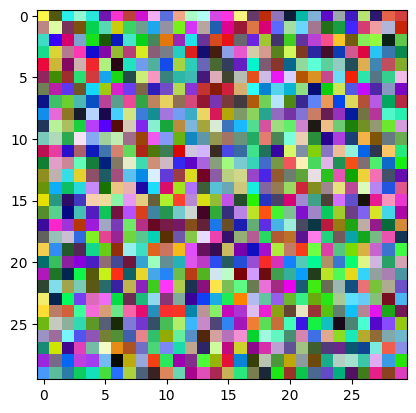

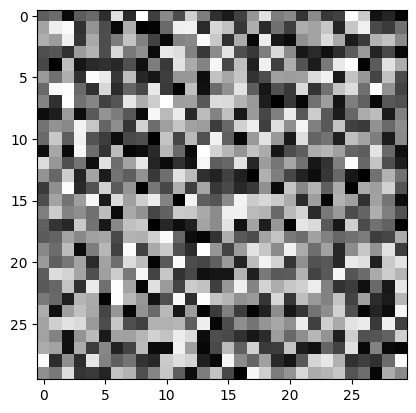

In [43]:
import matplotlib.pyplot as plt

width, height = 30, 30
color_image = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)
grayscale_image = np.random.randint(0, 256, (height, width), dtype=np.uint8)
plt.imshow(color_image,cmap="gray",vmin=0,vmax=255)
plt.show()
plt.imshow(grayscale_image,cmap="gray",vmin=0,vmax=255)
plt.show()

##### 2)Convert the code chunk found under section Divide an image into smaller patches using cropping into a function with the following signature:crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
#####  # img is the source image
##### # num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
##### # line_color is the color of the grid line.
##### # The output of the function should be image with grids

In [44]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    """
    Divide an image into smaller patches using cropping
    Parameters:
    - img: Source image (numpy array).
    - num_horizontal_grid: Number of patches along the x-axis.
    - num_vertical_grid: Number of patches along the y-axis.
    - line_color: Color of the grid lines.
    Returns:
    - Image with grids drawn.
    """
    height, width = img.shape[:2]
    M, N = int(height / num_vertical_grid), int(width / num_horizontal_grid)
    
    img_copy = img.copy()
    
    x1, y1 = 0, 0

    for y in range(0, height, M):
        for x in range(0, width, N):
        
            y1 = y + M
            x1 = x + N
            
            if x1 >= width and y1 >= height:
                y1 = height -1
                x1 = width  -1 
                cv.rectangle(img_copy,(x,y),(x1,y1),line_color,1)
            elif x1 >= width:
                x1 = width -1 
                cv.rectangle(img_copy,(x,y),(x1,y1),line_color,1)
            elif y1 >= height:
                y1 = height -1 
                cv.rectangle(img_copy,(x,y),(x1,y1),line_color,1)
            else:
                cv.rectangle(img_copy,(x,y),(x1,y1),line_color,1)
    return img_copy

In [45]:
# Test Case 1
img = cv.imread('images/lena.jfif')
num_horizontal_grid = 3
num_vertical_grid = 5
line_color = (0, 0, 255)  # Red Color
img_grided = crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
display_image("img_grided",img_grided)

In [46]:
# Test Case 2
img = cv.imread('images/lena.jfif')
num_horizontal_grid = 5
num_vertical_grid = 2
line_color = (255, 0, 0)  # Blue Color
img_grided = crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
display_image("img_grided",img_grided)

##### 3) How would you change the brightness of a color image? Suggest two ways to perform the image processing operations. Implement your methods by providing the example codes. You are free to choose any image.

In [47]:
def point_op(img, alpha, beta):
    """Point operator function
    Argument:
    ---
    img: input image
    alpha: coefficient
    beta: bias
    
    Returns:
    ---
    Unsigned 8-bit image array"""
    img = img.astype("float32")
    res = alpha * img + beta
    # clip the pixel values 
    res = np.clip(res, 0, 255)
    return np.uint8(res)

In [53]:
# First method increase alpha > 1
img = cv.imread("images/dog.png")
alpha = 1.8
dst = point_op(img,alpha,0)
display_images([img,dst],("original","enhanced"))

In [56]:
# Second method increase beta > 0
img = cv.imread("images/dog.png")
beta = 100
dst = point_op(img,1,beta)
display_images([img,dst],("original","enhanced"))

##### 4) Provide at least one common use cases for the following color spaces:
- RGB
- HSV
- CIELAB

1. RGB
Use Case: Digital Displays and Photography
2. HSV
Use Case: Image Processing and Color Selection
3. CIELAB
Use Case: Color Matching and Color Management